In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw =pd.read_json('Music/your_posts_1.json')
df_raw.head()

,timestamp,attachments,data,title,tags
0,2020-12-15 03:25:27,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'Happy birthday Shobrat Alvi'}],HM Sayedul Islam Arnob added a new photo to Sh...,NaN
1,2020-12-12 05:55:54,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'à¦®à§à¦®à¦¨à¦¸à¦¿à¦à¦¹ à¦à¦®à¦¿à...,NaN,NaN
2,2020-12-11 13:58:21,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'Happy birthday mamu ð°'}],HM Sayedul Islam Arnob added a new photo to Im...,NaN
3,2020-12-04 04:44:14,NaN,[{'post': 'à¦¶à§à¦­ à¦à¦¨à§à¦®à¦¦à¦¿à¦¨ à¦¶...,HM Sayedul Islam Arnob wrote on MD Al-amin's T...,NaN
4,2020-12-04 04:38:26,NaN,[{'post': 'à¦¹à§à¦¯à¦¾à¦ªà¦¿ à¦¬à¦¾à¦°à§à¦¥à...,HM Sayedul Islam Arnob wrote on Mohosiul M Ton...,NaN


In [3]:
df_raw.columns

Index(['timestamp', 'attachments', 'data', 'title', 'tags'], dtype='object')

In [4]:
df_raw.rename(columns={'timestamp': 'date'}, inplace=True)
df=df_raw.drop(['attachments', 'title', 'tags'], axis=1)
pd.to_datetime(df['date'])
df.head()

,date,data
0,2020-12-15 03:25:27,[{'post': 'Happy birthday Shobrat Alvi'}]
1,2020-12-12 05:55:54,[{'post': 'à¦®à§à¦®à¦¨à¦¸à¦¿à¦à¦¹ à¦à¦®à¦¿à...
2,2020-12-11 13:58:21,[{'post': 'Happy birthday mamu ð°'}]
3,2020-12-04 04:44:14,[{'post': 'à¦¶à§à¦­ à¦à¦¨à§à¦®à¦¦à¦¿à¦¨ à¦¶...
4,2020-12-04 04:38:26,[{'post': 'à¦¹à§à¦¯à¦¾à¦ªà¦¿ à¦¬à¦¾à¦°à§à¦¥à...


In [5]:
df.tail()

,date,data
300,2015-07-20 01:55:45,[{'post': 'My College Campus.'}]
301,2015-07-20 01:24:42,NaN
302,2015-07-19 18:27:48,"[{'post': '""""""Charfassion Towar Ar uporea """"'..."
303,2015-07-19 16:39:00,[]
304,2015-07-19 16:37:51,[{'post': 'Charfassion TV High School'}]


In [6]:
df.shape

(305, 2)

In [7]:
df.isnull().sum()

date     0
data    11
dtype: int64

In [8]:
df=df.set_index('date')
post_counts=df['data'].resample('MS').size()
post_counts

date
2015-07-01    14
2015-08-01    12
2015-09-01     0
2015-10-01     1
2015-11-01     0
              ..
2020-08-01     7
2020-09-01     3
2020-10-01    16
2020-11-01    11
2020-12-01     5
Freq: MS, Name: data, Length: 66, dtype: int64

([<matplotlib.axis.XTick at 0x1c8ae438a88>,
 <a list of 5 Text xticklabel objects>)

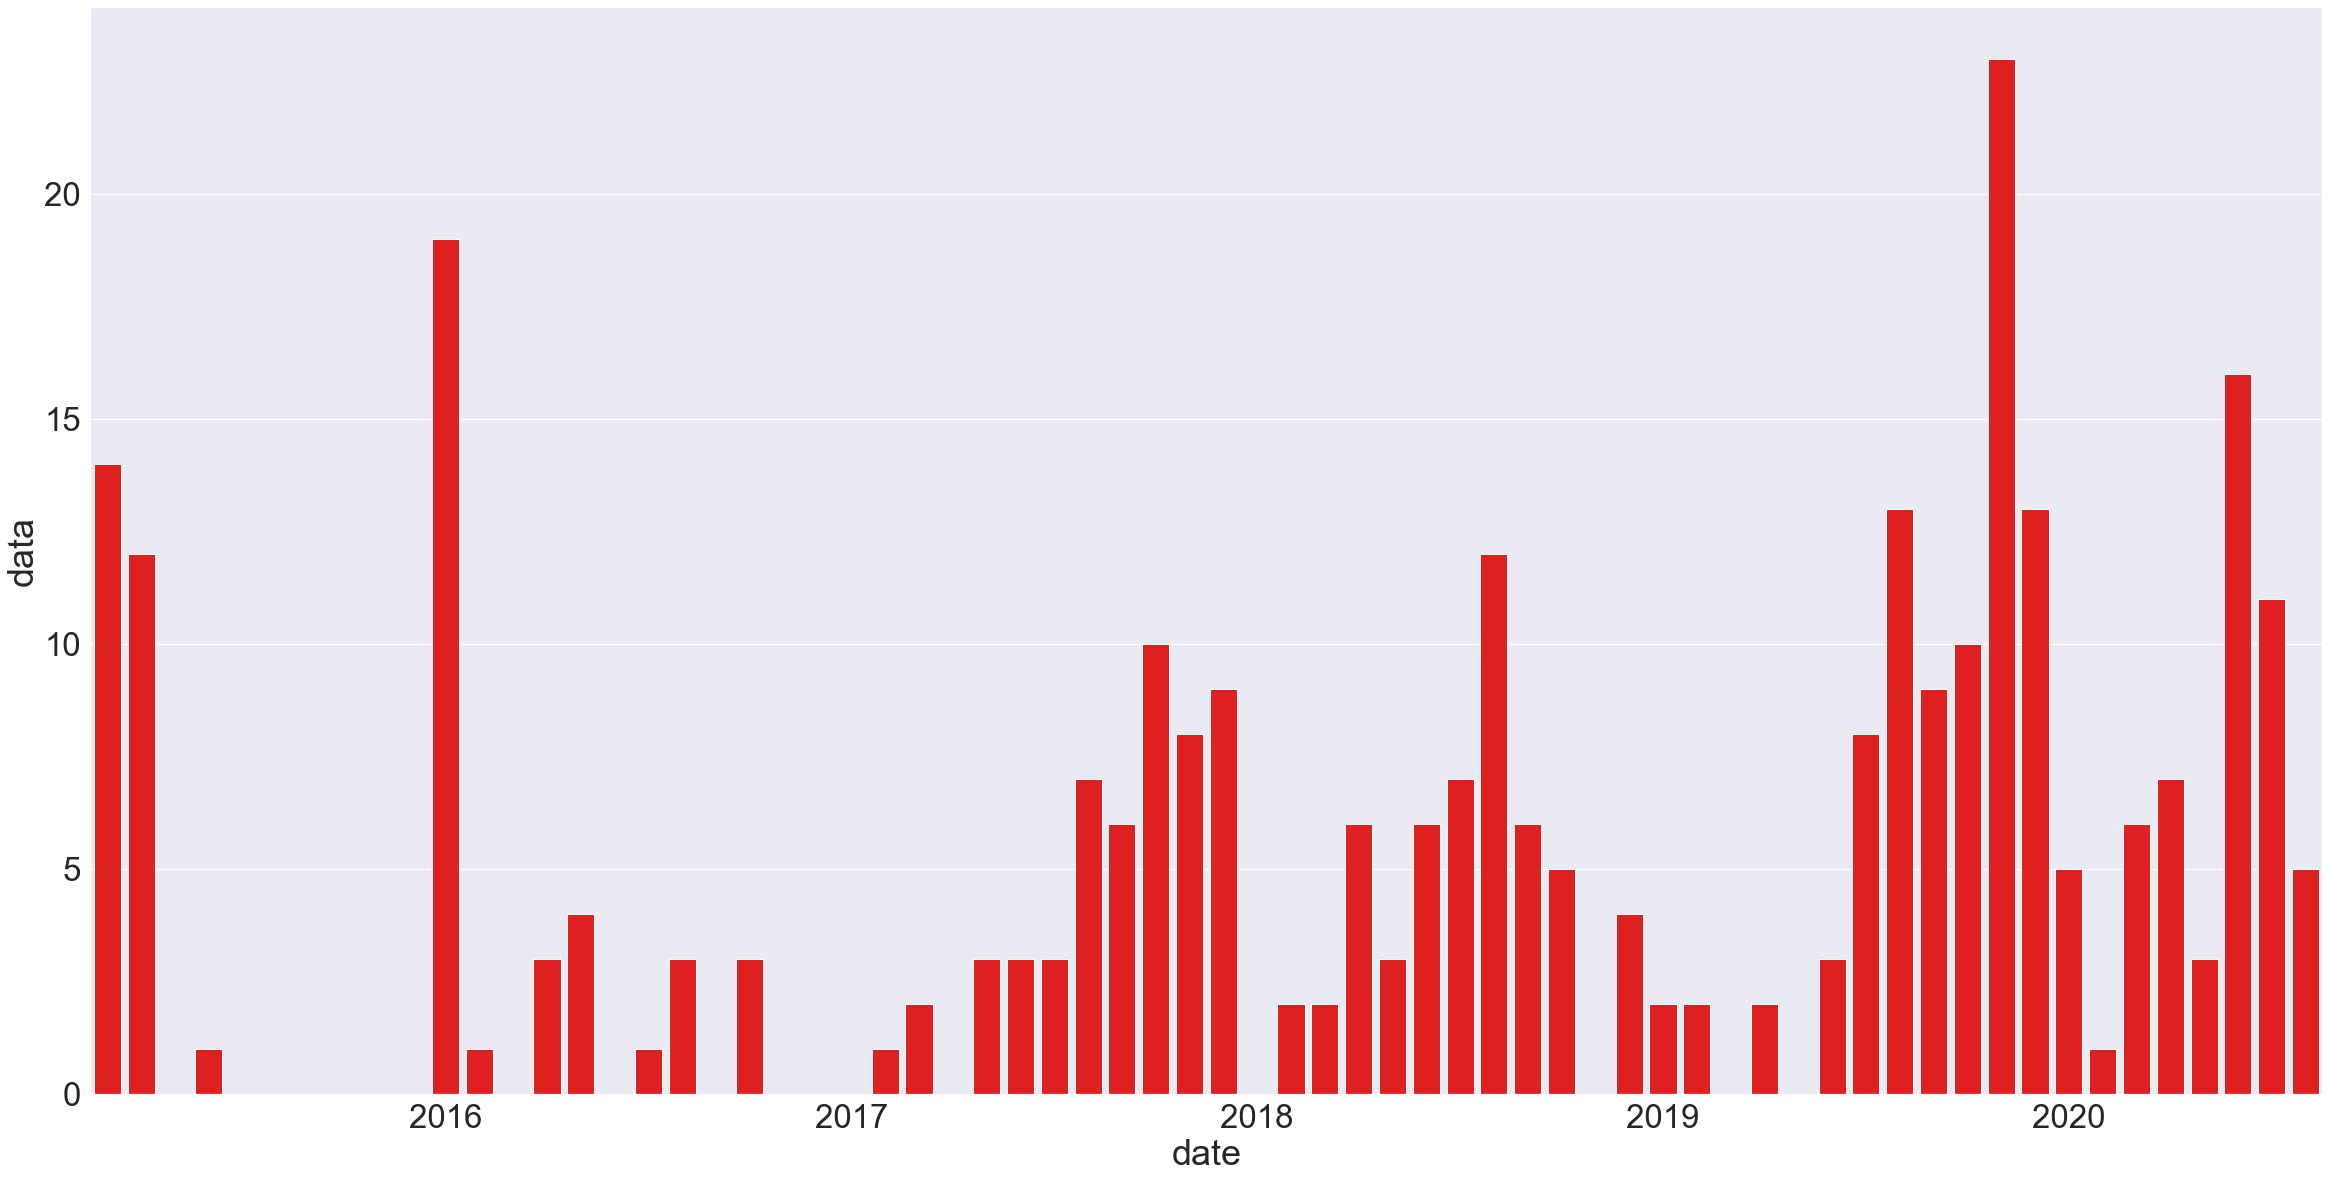

In [13]:
sns.set(rc={'figure.figsize': (40, 20)})
sns.set(font_scale=3)
x_labels=post_counts.index
sns.barplot(x_labels, post_counts, color='red')
tick_positions=np.arange(10, len(x_labels), step=12)
#plt.xticks(rotation=90)
plt.xticks(tick_positions, x_labels[tick_positions].strftime('%Y'))

In [ ]:
post_counts.max()